In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [14]:
# Load data
pep_file = "https://raw.githubusercontent.com/leonjessen/keras_tensorflow_demo/master/data/ran_peps_netMHCpan40_predicted_A0201_reduced_cleaned_balanced.tsv"
pep_dat = pd.read_csv(pep_file, sep="\t")

In [15]:
# Summary of data
pep_dat.head()

,peptide,label_chr,label_num,data_type
0,LLTDAQRIV,WB,1,train
1,LMAFYLYEV,SB,2,train
2,VMSPITLPT,WB,1,test
3,SLHLTNCFV,WB,1,train
4,RQFTCMIAV,WB,1,train


Epoch 1/150


/nix/store/rwgssp49j69i01psj28vilpqr2zsldin-python3-3.12.9-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3345 - loss: 1.1292 - val_accuracy: 0.3381 - val_loss: 1.1002
Epoch 2/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3343 - loss: 1.1039 - val_accuracy: 0.3299 - val_loss: 1.1030
Epoch 3/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3322 - loss: 1.1034 - val_accuracy: 0.3311 - val_loss: 1.0989
Epoch 4/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3373 - loss: 1.1008 - val_accuracy: 0.3252 - val_loss: 1.0987
Epoch 5/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3415 - loss: 1.1005 - val_accuracy: 0.3332 - val_loss: 1.0992
Epoch 6/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3301 - loss: 1.1002 - val_accuracy: 0.3213 - val_loss: 1.0987
Epoch 7/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3364 - loss: 1.0993 - val_accuracy: 0.3386 - val_loss: 1.0988
Epoch 8/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3315 - loss: 1.0995 - val_accuracy: 0.3299

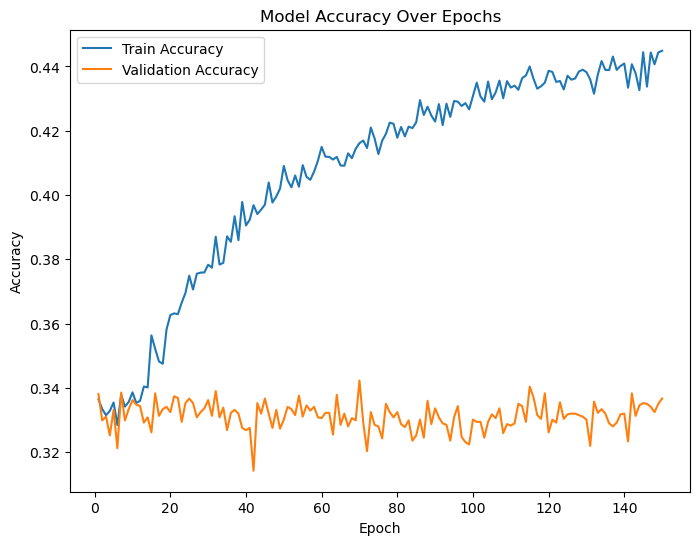

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.3477 - loss: 1.1964
Test Accuracy: 32.702%
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step


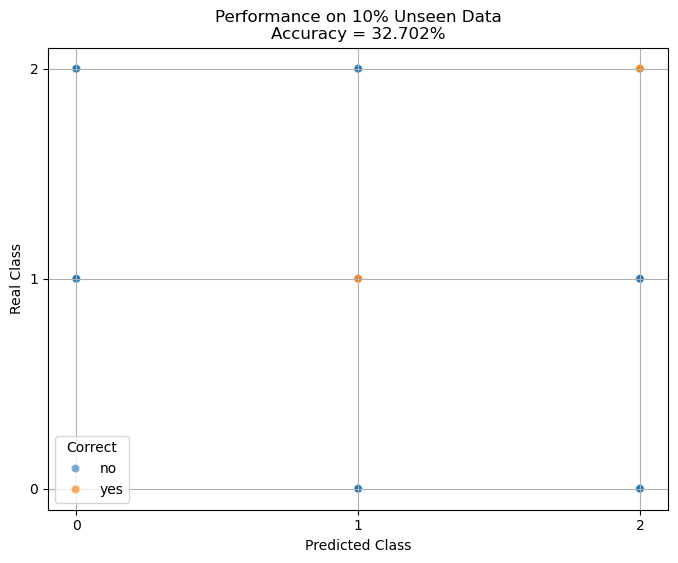

In [11]:
# Function to encode peptides (this needs to be implemented)
def pep_encode(peptides):
    # Placeholder function: Implement actual peptide encoding logic
    # Assuming one-hot encoding or some numerical transformation
    return np.random.rand(len(peptides), 180)  # Mock encoding with random values

# Prepare training and testing data
x_train = pep_encode(pep_dat[pep_dat['data_type'] == 'train']['peptide'])
y_train = pep_dat[pep_dat['data_type'] == 'train']['label_num'].values
x_test = pep_encode(pep_dat[pep_dat['data_type'] == 'test']['peptide'])
y_test = pep_dat[pep_dat['data_type'] == 'test']['label_num'].values

# Reshape inputs
x_train = x_train.reshape((x_train.shape[0], 180))
x_test = x_test.reshape((x_test.shape[0], 180))

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define model
model = Sequential([
    Dense(180, activation='relu', input_shape=(180,)),
    Dropout(0.4),
    Dense(90, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=150, batch_size=50, validation_split=0.2)

# Plot accuracy over epochs
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 151), y=history.history['accuracy'], label="Train Accuracy")
sns.lineplot(x=range(1, 151), y=history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

# Evaluate model
perf = model.evaluate(x_test, y_test)
accuracy = round(perf[1] * 100, 3)
print(f"Test Accuracy: {accuracy}%")

# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)
y_real = np.argmax(y_test, axis=1)

# Create results dataframe
results = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
results['Correct'] = np.where(results['y_real'] == results['y_pred'], 'yes', 'no')

# Plot predictions vs real labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results, x='y_pred', y='y_real', hue='Correct', alpha=0.6)
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.title(f"Performance on 10% Unseen Data\nAccuracy = {accuracy}%")
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()
